<a href="https://colab.research.google.com/github/fabiohsst/MovieLens_EDA/blob/master/Forma%C3%A7%C3%A3o_Data_Science_Alura_An%C3%A1lise_explorat%C3%B3ria_do_MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:** Fabio Tavares

**Email:** fabio.tavares.fma@gmail.com

**LinkedIn:** [Fabiohsst](https://www.linkedin.com/in/fabiohsst/)

## Certification Data Science Alura - Exploratory Data Analysis MovieLens
In the Data Science certification at www.alura.com.br, was used the datasets of movie ratings dataset from the MovieLens website. In this project, was conducted an exploratory analysis of these data.

In [1]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.5.3
Usando seaborn 0.9.0
Usando scipy 1.11.4


## Load Movies

- The data `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` must be load in `filmes`
- Rename columns to `filmeId`, `titulo` and `generos`
- Set index (`index`) to `filmeId`

In [2]:
## importando arquivo
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')

In [3]:
# renomeando colunas
filmes.columns = ['filmeId','titulo', 'generos']

In [4]:
# configurando o indice
filmes = filmes.set_index('filmeId')

In [5]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [6]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Extracting year of movies:

In [7]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Loading scores

- The Data `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` must be load in `notas`
- Rename coluns to `usuarioId`, `filmeId`, `nota` and `momento`

In [8]:
# lendo o arquivo notas
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv')

In [9]:
# renomeando as colunas
notas.columns = ['usuarioId','filmeId','nota', 'momento']

In [10]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Creating new feature movies `nota_media`

- Create a new column `nota_media` on the dataframe `filmes`



In [11]:
# adicionando a columa nota_media ao dataframe filmes
filmes['nota_media'] = notas.groupby("filmeId").nota.mean()

In [12]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Data cleaning - Removing movies with less than 50 scores



## Solução

In [13]:
# calcular o total de votos por filme
len(notas.filmeId)

100836

In [14]:
# criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = notas['filmeId'].value_counts()

In [15]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143,7.0
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429,49.0


In [16]:
# removendo filmes com 49 ou menos votos
filmes = filmes.query('total_de_votos > 49')

In [17]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizing Data

## Visualize average scores

- histogram
- cummulative distribution function



In [18]:
# mudando cor e estilo do gráfico
sns.set_palette("Dark2")
sns.set_style('ticks')

In [19]:
nota_media = filmes.nota_media.dropna()

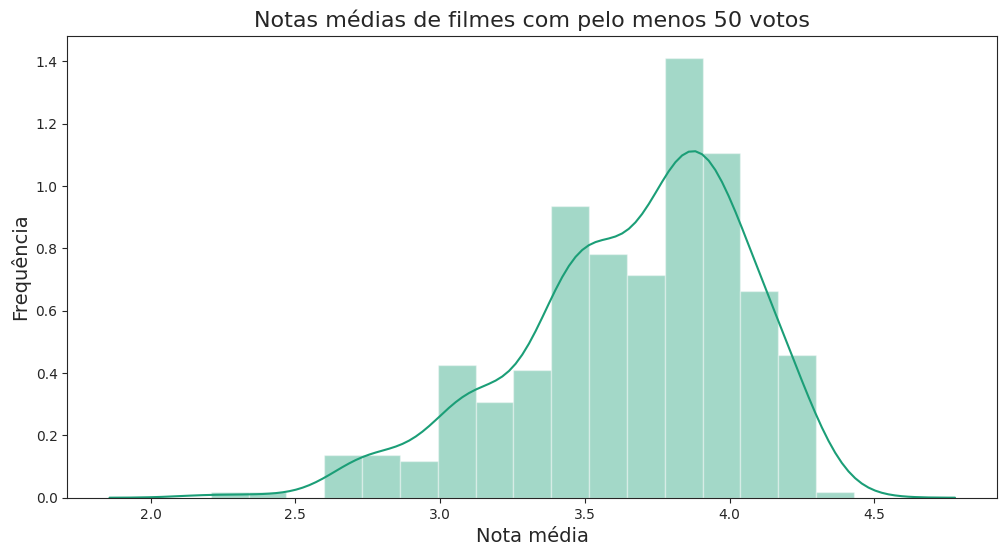

In [20]:
# solução histograma
notas_medias_hist = sns.distplot(nota_media)
notas_medias_hist.set_xlabel('Nota média', fontsize = 14)
notas_medias_hist.set_ylabel('Frequência', fontsize = 14)
notas_medias_hist.set_title('Notas médias de filmes com pelo menos 50 votos', fontsize = 16)
notas_medias_hist.figure.set_size_inches(12,6)

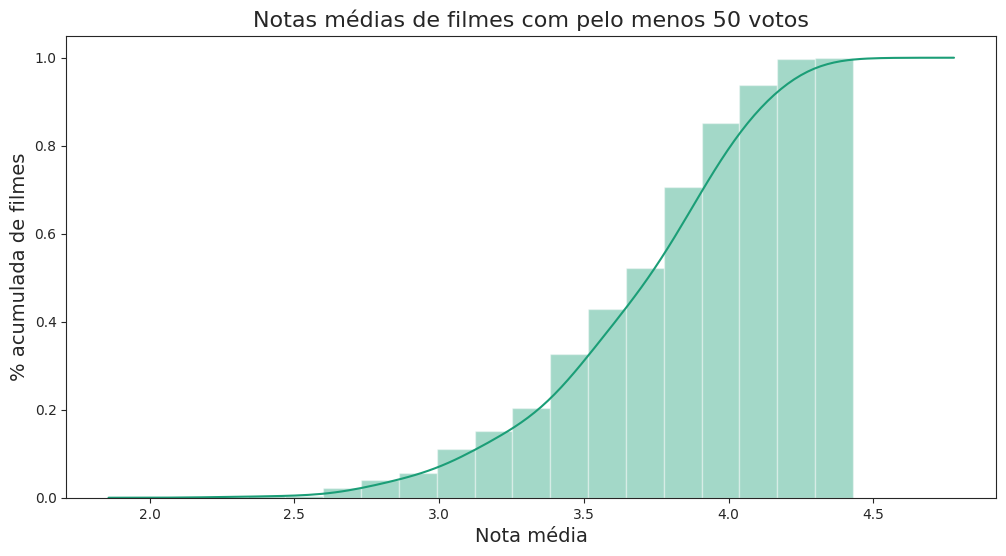

In [21]:
# solução cumulativa
notas_medias_cumul = sns.distplot(nota_media,
                  hist_kws = {'cumulative':True},
                     kde_kws = {'cumulative':True})
notas_medias_cumul.set_xlabel('Nota média', fontsize = 14)
notas_medias_cumul.set_ylabel('% acumulada de filmes', fontsize = 14)
notas_medias_cumul.set_title('Notas médias de filmes com pelo menos 50 votos',fontsize = 16)
notas_medias_cumul.figure.set_size_inches(12,6)

## Visualize total scores

- histogram
- cummulative distribution function

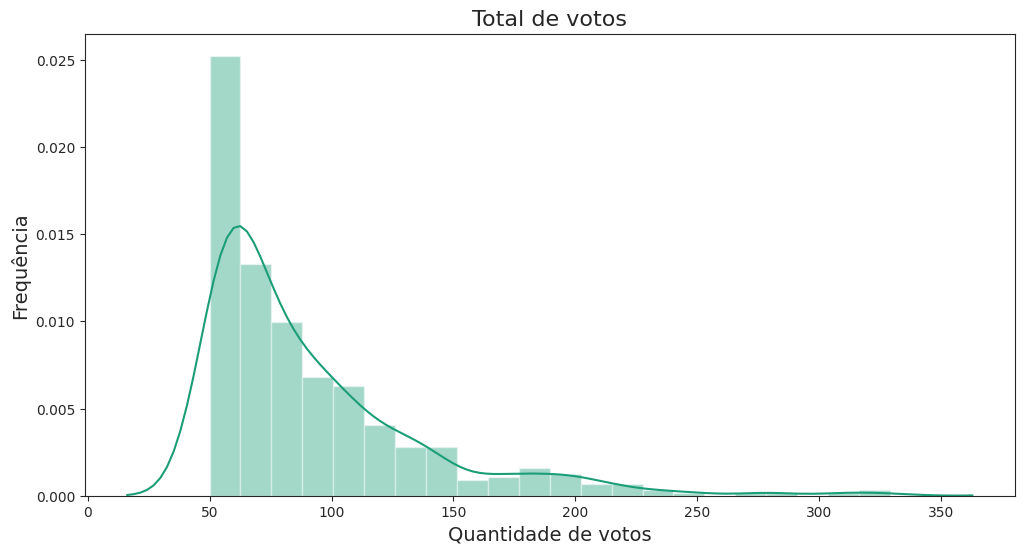

In [22]:
# solução histograma
total_de_votos_hist = sns.distplot(filmes['total_de_votos'])
total_de_votos_hist.set_xlabel('Quantidade de votos', fontsize = 14)
total_de_votos_hist.set_ylabel('Frequência', fontsize = 14)
total_de_votos_hist.set_title('Total de votos', fontsize = 16)
total_de_votos_hist.figure.set_size_inches(12,6)

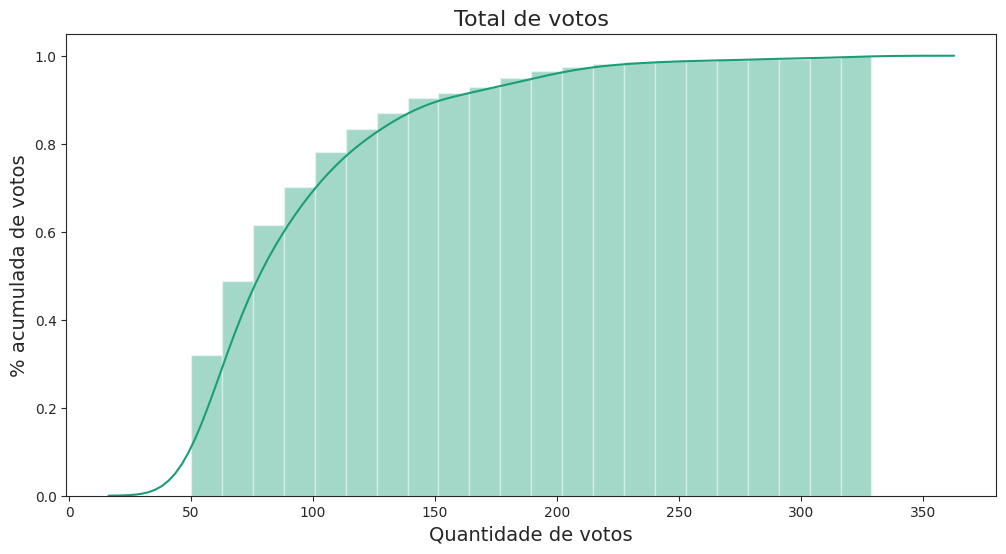

In [23]:
# solução cumulativa
total_de_votos_cumul = sns.distplot(filmes['total_de_votos'],
                  hist_kws = {'cumulative':True},
                     kde_kws = {'cumulative':True})
total_de_votos_cumul.set_xlabel('Quantidade de votos', fontsize = 14)
total_de_votos_cumul.set_ylabel('% acumulada de votos', fontsize = 14)
total_de_votos_cumul.set_title('Total de votos',fontsize = 16)
total_de_votos_cumul.figure.set_size_inches(12,6)

## 20% of movies have score bigger than...



In [24]:
# solução
nota_limite_dos_20_porcento = nota_media.quantile(.2)
nota_limite_dos_20_porcento

3.374285714285714

In [25]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.37


## Splitting gender column


In [26]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [27]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Visualize number of movies per genre


- For each gender the number of movies must be grouped.
- Sort bars on descendent order.



In [28]:
# solução
# definindo uma variável para soma de valores e classificação de valores decrescentes
generos_sum = generos.sum().sort_values(ascending = False)

Text(0.5, 1.0, 'Filmes por gênero')

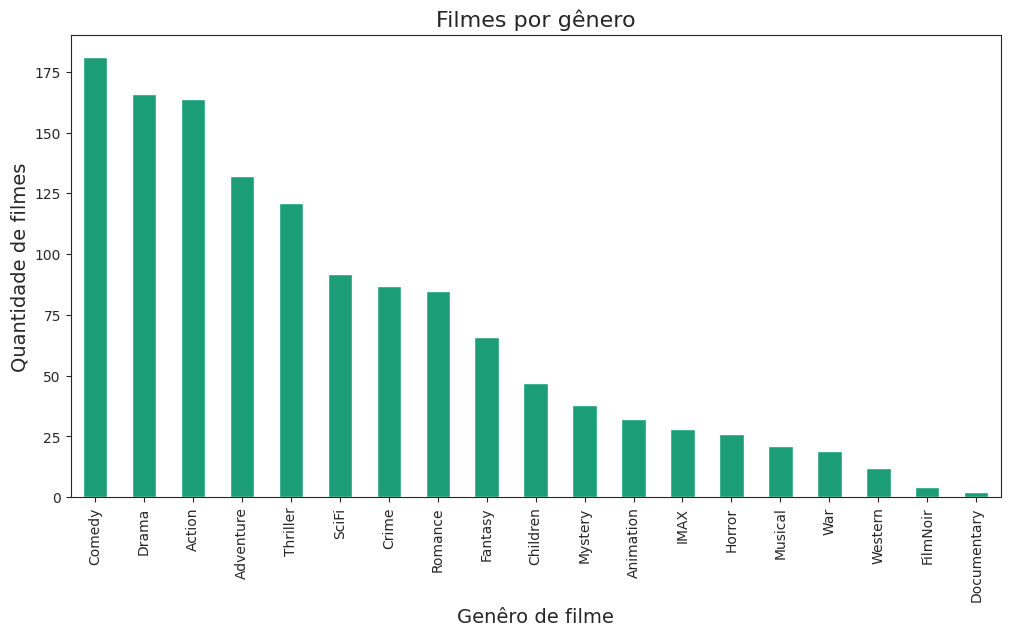

In [29]:
# gráfico de barras
generos_bar = generos_sum.plot(kind = 'bar')
generos_bar.figure.set_size_inches(12,6)
generos_bar.set_xlabel('Genêro de filme', fontsize = 14)
generos_bar.set_ylabel('Quantidade de filmes', fontsize = 14)
generos_bar.set_title('Filmes por gênero',fontsize = 16)

## Top 5 genres with more movies



In [30]:
# solução
top5_generos_em_quantidade_de_filmes = generos_sum.sort_values(ascending = False).head(5)

In [31]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Visualize score by genre

- Sort in descendent order
- plot by gender

In [32]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [33]:
# solucão
# definindo variável com soma de notas por gênero e classificando do maior para o menor
votos_por_genero_por_filme_sum = votos_por_genero_por_filme.sum().sort_values(ascending = False)
votos_por_genero_por_filme_sum

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

Text(0.5, 1.0, 'Filmes por gênero')

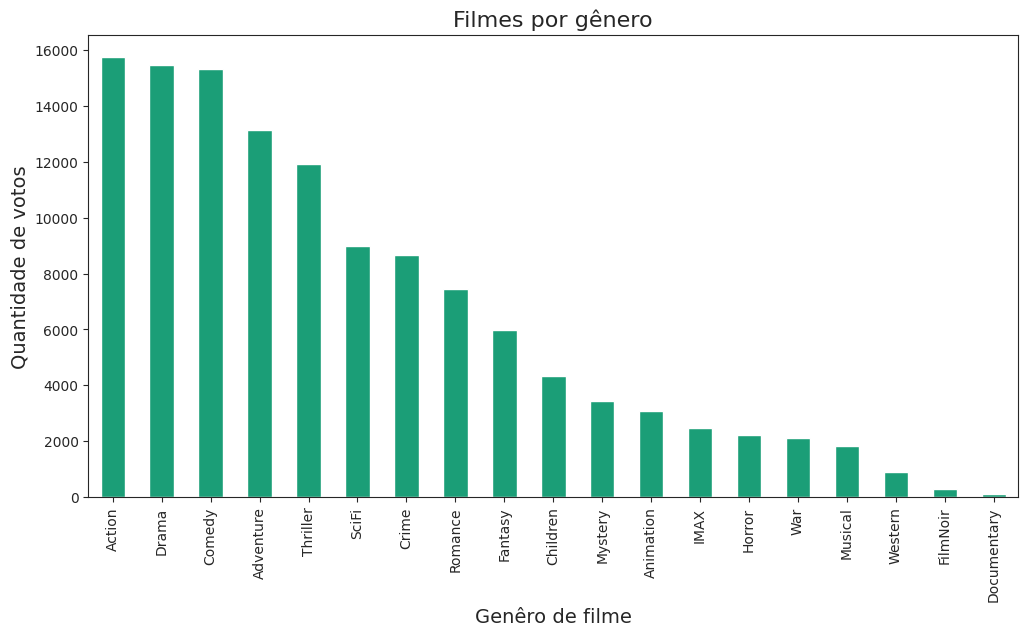

In [34]:
# solução
# gráfico de barras
votos_por_genero_por_filme_bar = votos_por_genero_por_filme_sum.plot(kind = 'bar')
votos_por_genero_por_filme_bar.figure.set_size_inches(12,6)
votos_por_genero_por_filme_bar.set_xlabel('Genêro de filme', fontsize = 14)
votos_por_genero_por_filme_bar.set_ylabel('Quantidade de votos', fontsize = 14)
votos_por_genero_por_filme_bar.set_title('Filmes por gênero',fontsize = 16)


## Score per movie per genre


Understanding the distribution of scores by distribution of movies of each genre.



In [35]:
# solucao código
# calculando quantidade de votos dividido pelo total de filmes em cada gênero
media_votos_por_filme_por_genero = (votos_por_genero_por_filme / generos_sum).sum().sort_values(ascending = False)
media_votos_por_filme_por_genero

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

Text(0.5, 1.0, 'Média de votos por gênero de filmes')

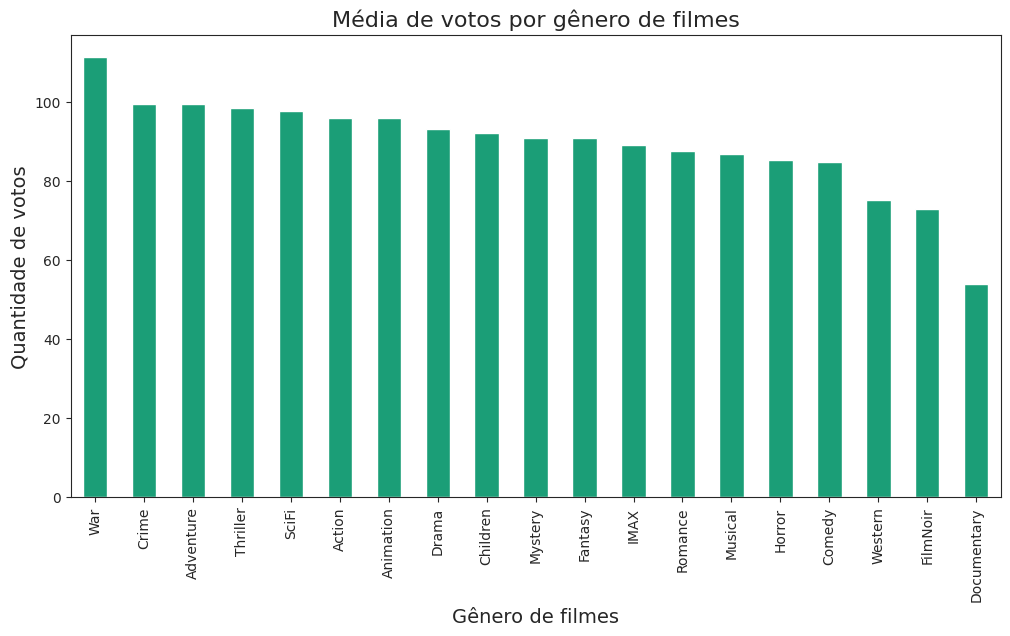

In [36]:
# solução com visualização
# gráfico de barras
media_votos_por_filme_por_genero_bar = media_votos_por_filme_por_genero.plot(kind = 'bar')
media_votos_por_filme_por_genero_bar.figure.set_size_inches(12,6)
media_votos_por_filme_por_genero_bar.set_xlabel('Gênero de filmes', fontsize = 14)
media_votos_por_filme_por_genero_bar.set_ylabel('Quantidade de votos', fontsize = 14)
media_votos_por_filme_por_genero_bar.set_title('Média de votos por gênero de filmes',fontsize = 16)

## Thoughts about genres `Action` and `War`

### The genre "War" has much fewer votes and a smaller number of movies compared to the genre "Action." However, on average, movies in the "War" genre receive more votes compared to the "Action" genre.
    
    

## Building boxplots comparing `total_de_votos` of `Horror` e `Adventure`  



In [37]:
#importanto matplotlib
import matplotlib.pyplot as plt

In [38]:
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir',
          'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']

for genre in genres:
    locals()[f'total_{genre.lower()}'] = votos_por_genero_por_filme[votos_por_genero_por_filme[genre] > 0]

Text(0.5, 1.0, 'Distribuição de total de votos para os gêneros Horror e Adventure')

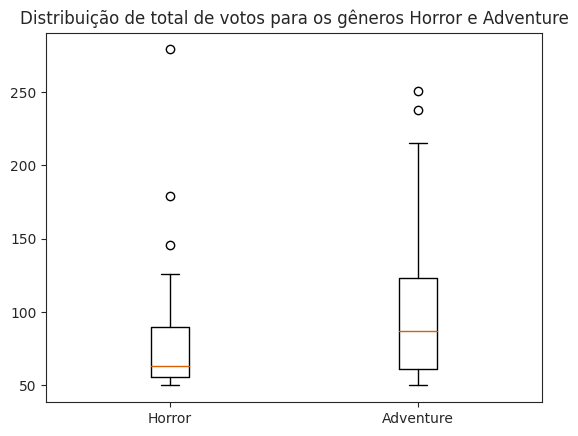

In [39]:
# solução:
# plotando gráfico boxplot para os filmes do gênero Horror e Adventure
plt.boxplot([total_horror['Horror'], total_adventure['Adventure']], labels = ['Horror', 'Adventure'])
plt.title('Distribuição de total de votos para os gêneros Horror e Adventure')

## Plot a boxplot per category




In [40]:
generos.columns

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'],
      dtype='object')

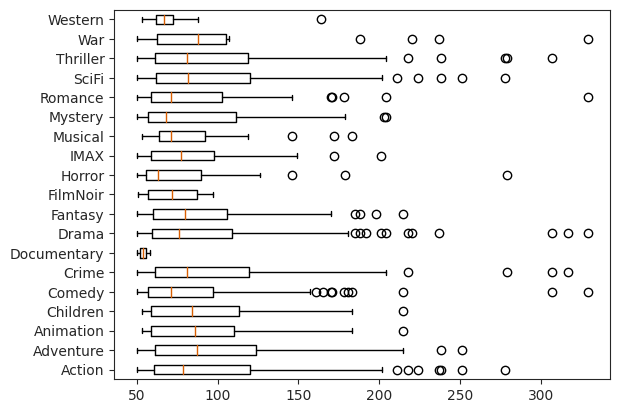

In [41]:
# plotando o boxplot
total_de_votos_box = plt.boxplot([total_action['Action'],total_adventure['Adventure'],total_animation['Animation'],total_children['Children'],
                       total_comedy['Comedy'],total_crime['Crime'],total_documentary['Documentary'],total_drama['Drama'],
                       total_fantasy['Fantasy'],total_filmnoir['FilmNoir'],total_horror['Horror'],total_imax['IMAX'],
                       total_musical['Musical'],total_mystery['Mystery'],total_romance['Romance'],
                       total_scifi['SciFi'],total_thriller['Thriller'],total_war['War'],total_western['Western']],
                       labels = ['Action','Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
                       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'],vert = False,)

##  I want to create a film with only one genre: Horror or Adventure. I want to have a better chance of generating revenue to cover my expenses, even if it's not a massive blockbuster. Which of the two genres do you suggest

###  Considering the overall vote count, "Adventure" films exhibit stronger performance when compared to "Horror" movies.


## Apply a statistical test to assess if there is statistical significance in the distribution of votes for "Adventure" and "Horror" films. Does your recommendation remain the same? Please explain.

- Visualize the distribution of both through histograms.
- If you suspect normality in the distribution, conduct a normality test for both.
- Apply an appropriate test for comparing distributions.
- Explain the result obtained.
- Use a significance level of p=0.05.

Text(0.5, 1.0, 'Histograma de filmes de aventura')

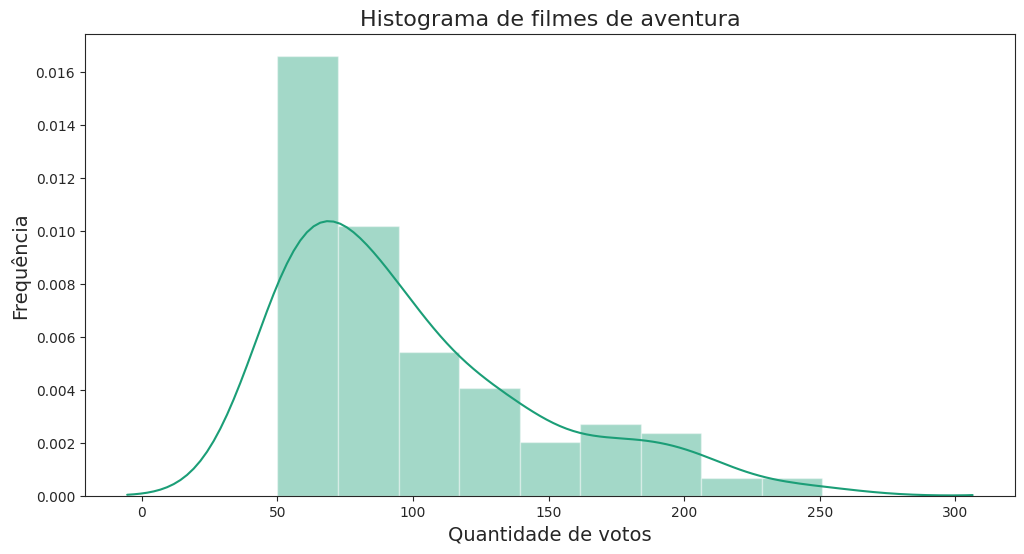

In [42]:
# solucao histograma de aventura
total_adventure_hist = sns.distplot(total_adventure['Adventure'], norm_hist = False, kde = True)
total_adventure_hist.figure.set_size_inches(12,6)
total_adventure_hist.set_xlabel('Quantidade de votos', fontsize = 14)
total_adventure_hist.set_ylabel('Frequência', fontsize = 14)
total_adventure_hist.set_title('Histograma de filmes de aventura',fontsize = 16)

Text(0.5, 1.0, 'Histograma de filmes de horror')

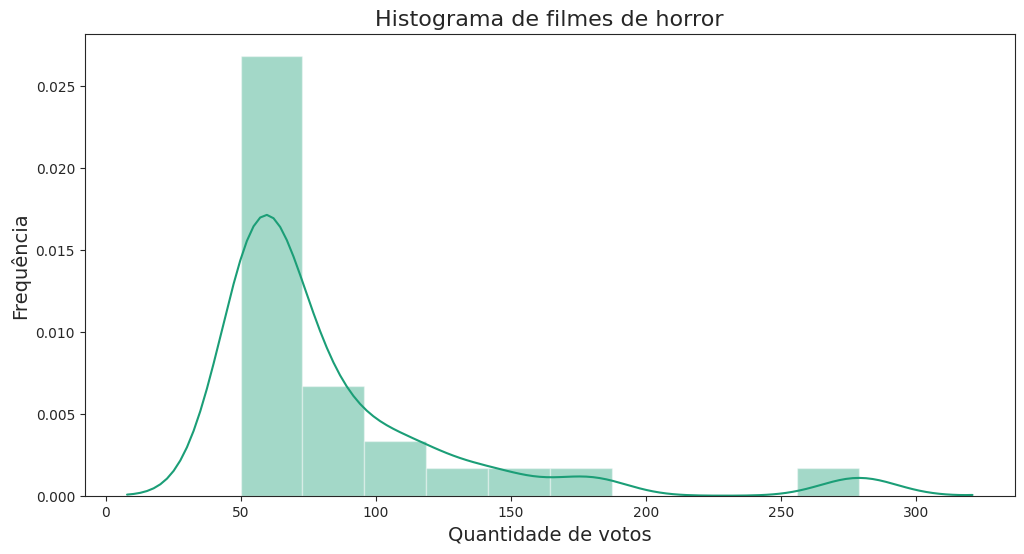

In [43]:
# solucao histograma de horror
total_horror_hist = sns.distplot(total_horror['Horror'], norm_hist = False, kde = True)
total_horror_hist.figure.set_size_inches(12,6)
total_horror_hist.set_xlabel('Quantidade de votos', fontsize = 14)
total_horror_hist.set_ylabel('Frequência', fontsize = 14)
total_horror_hist.set_title('Histograma de filmes de horror',fontsize = 16)

In [44]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

In [45]:
# importando stats da biblioteca scipy
import scipy.stats as stats

In [46]:
# testando normalidade do conjunto de dados de filmes de adventure
shapiro_stat, shapiro_p_value = stats.shapiro(total_adventure)
print("O valor estatístico de Shapiro-Wilk é " + str(shapiro_stat))
print("O valor de p de Shapiro-Wilk é " + str(shapiro_p_value))

O valor estatístico de Shapiro-Wilk é 0.509732723236084
O valor de p de Shapiro-Wilk é 0.0


In [47]:
# conclusão do teste de normalidade de filmes de adventure
if shapiro_p_value > 0.05:
    print("Com 95% de confiança, os dados seguem uma distribuição normal segundo o teste de Shapiro-Wilk")
else:
    print("Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk")

Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk


In [48]:
# testando normalidade do conjunto de dados de filmes de horror
shapiro_stat, shapiro_p_value = stats.shapiro(total_horror)
print("O valor estatístico de Shapiro-Wilk é " + str(shapiro_stat))
print("O valor de p de Shapiro-Wilk é " + str(shapiro_p_value))

O valor estatístico de Shapiro-Wilk é 0.42745596170425415
O valor de p de Shapiro-Wilk é 8.988762403025343e-37


In [49]:
# conclusão do teste de normalidade de filmes de horror
if shapiro_p_value > 0.05:
    print("Com 95% de confiança, os dados seguem uma distribuição normal segundo o teste de Shapiro-Wilk")
else:
    print("Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk")

Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk


In [50]:
# aplicando um teste de comparação das distribuições
# importando t-test from statsmodels e aplicando o teste na minha hipótese
from scipy.stats import ttest_ind
statstic, pvalue = ttest_ind(total_adventure.mean(), total_horror.mean())
print("O valor do tstatic é " + str(statstic))
print("O valor de p é " + str(pvalue))

O valor do tstatic é 0.7794996692315427
O valor de p é 0.4407800704919064


In [51]:
# conclusão da minha hipótese
if pvalue > 0.05:
    print("Com 95% de confiança, os filmes do gênero adventure possuem um público maior em relação aos filmes de horror")
else:
    print("Com 95% de confiança, os filmes do gênero adventure não possuem um público maior em relação aos filmes de horror")

Com 95% de confiança, os filmes do gênero adventure possuem um público maior em relação aos filmes de horror


### Using the t-test, it was possible to statistically confirm the initial hypothesis that Adventure genre films have, on average, more votes than Horror genre films. Therefore, we assume that the Adventure genre has a larger audience.
### We can reach this conclusion because the p-value is higher than the established 95% confidence interval (p-value = 0.05).


## Create the same boxplots for the average ratings (`nota_media`) of `Adventure` e `Horror` genres.



In [95]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [53]:
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
# solução
# montando dataset para nota média por gêneros
nota_por_genero = pd.DataFrame((generos.values.T * filmes['nota_media'].values).T, columns = generos.columns)
nota_por_genero.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.000000,3.920930,3.92093,3.920930,3.920930,0.000000,0.0,0.0,3.920930,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.000000,3.431818,0.00000,3.431818,0.000000,0.000000,0.0,0.0,3.431818,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.00000,0.000000,3.259615,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.259615,0.0,0.000000,0.0,0.0
3,3.946078,0.000000,0.00000,0.000000,0.000000,3.946078,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.946078,0.0,0.0
4,0.000000,0.000000,0.00000,0.000000,3.185185,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.185185,0.0,0.000000,0.0,0.0


In [55]:
# definindo varíavel de soma das notas por gênero
nota_por_genero_sum = nota_por_genero.sum()

In [56]:
# nota média por gênero de filmes
nota_media_por_genero = (nota_por_genero_sum / generos_sum)
nota_media_por_genero.sort_values(ascending = False)

FilmNoir       3.993500
War            3.891989
Mystery        3.826702
Crime          3.811684
Drama          3.801969
IMAX           3.759428
Animation      3.722514
Thriller       3.652313
Musical        3.648148
Fantasy        3.643526
Documentary    3.642931
Children       3.628869
Adventure      3.615373
Horror         3.610527
Romance        3.605779
Action         3.584995
SciFi          3.559644
Comedy         3.543408
Western        3.524939
dtype: float64

In [57]:
# Definindo nota média para filmes de horror
nota_adventure = nota_por_genero[nota_por_genero['Adventure'] > 0]
nota_horror = nota_por_genero[nota_por_genero['Horror'] > 0]

Text(0.5, 1.0, 'Distribuição de notas para os gêneros Horror e Adventure')

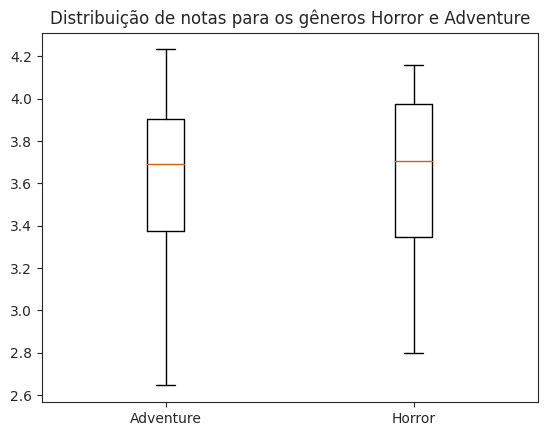

In [58]:
# plotando boxplot para notas dos filmes do gênero Adventure e Horror
plt.boxplot([nota_adventure['Adventure'],nota_horror['Horror']], labels = ['Adventure','Horror'])
plt.title('Distribuição de notas para os gêneros Horror e Adventure')

## I want to make a film that is critically acclaimed, with people giving high ratings, even if the viewership is not very large. Which genre do you recommend if I have to choose only one between Adventure and Horror?

### Both films seem to have similar ratings, with no significant difference between the two genres.



## Apply a statistical test to check for statistical significance in the distribution of ratings for Adventure and Horror films.


- Visualize the distribution of both through histograms.
- If you suspect normality in the distribution, conduct a normality test for both.
- Apply an appropriate test for comparing the distributions.
- Explain the result obtained.
- Use a significance level of p=0.05.

Text(0.5, 1.0, 'Histograma de notas de filmes de aventura')

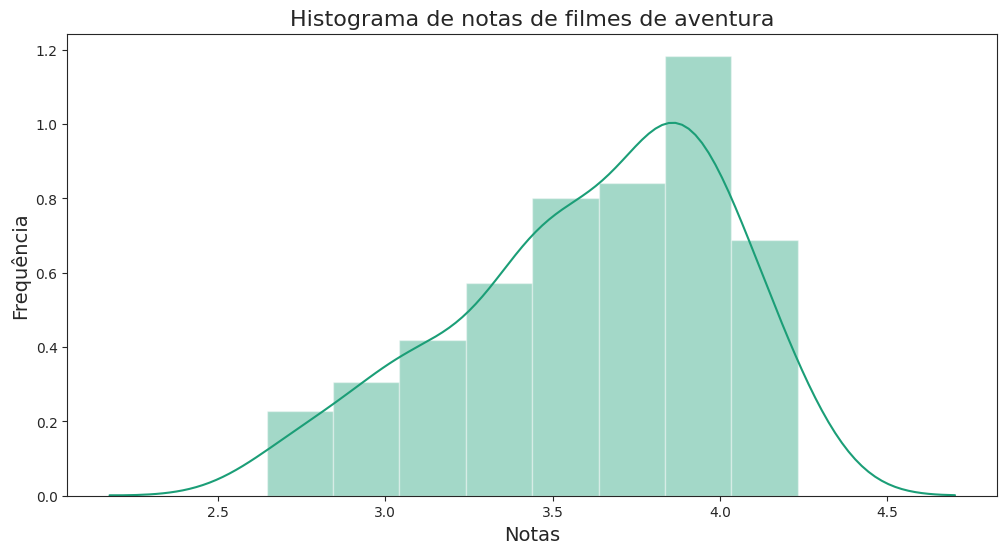

In [59]:
# solucao histograma de aventura
nota_adventure_hist = sns.distplot(nota_adventure['Adventure'], norm_hist = False, kde = True)
nota_adventure_hist.figure.set_size_inches(12,6)
nota_adventure_hist.set_xlabel('Notas', fontsize = 14)
nota_adventure_hist.set_ylabel('Frequência', fontsize = 14)
nota_adventure_hist.set_title('Histograma de notas de filmes de aventura',fontsize = 16)

Text(0.5, 1.0, 'Histograma de notas de filmes de horror')

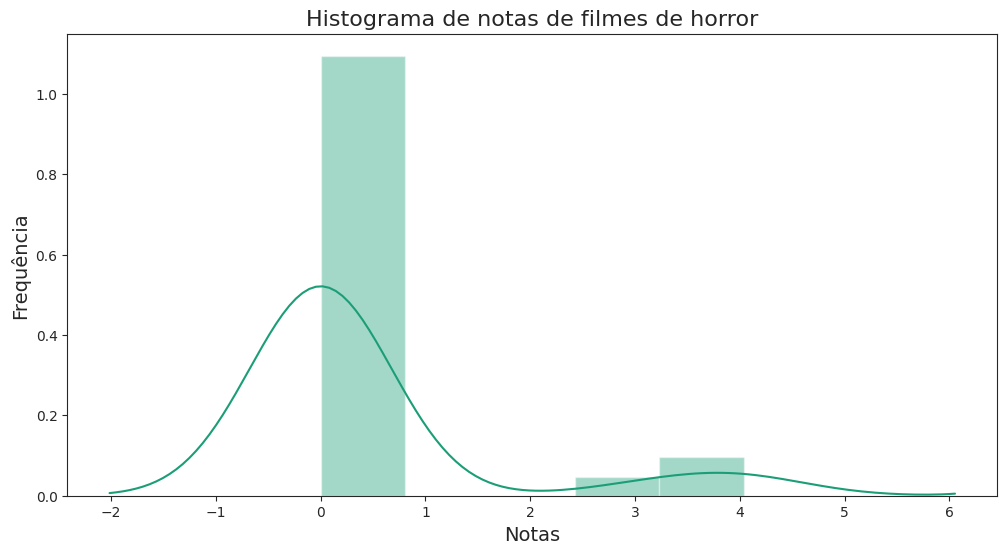

In [60]:
# solucao histograma de horror
nota_horror_hist = sns.distplot(nota_horror['Adventure'], norm_hist = False, kde = True)
nota_horror_hist.figure.set_size_inches(12,6)
nota_horror_hist.set_xlabel('Notas', fontsize = 14)
nota_horror_hist.set_ylabel('Frequência', fontsize = 14)
nota_horror_hist.set_title('Histograma de notas de filmes de horror',fontsize = 16)

In [61]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
# utilizando teste de normalidade de Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(nota_adventure)
print("O valor estatístico de Shapiro-Wilk é " + str(shapiro_stat))
print("O valor de p de Shapiro-Wilk é " + str(shapiro_p_value))

O valor estatístico de Shapiro-Wilk é 0.5114635229110718
O valor de p de Shapiro-Wilk é 0.0


In [62]:
# conclusão do teste de normalidade de filmes de adventure
if shapiro_p_value > 0.05:
    print("Com 95% de confiança, os dados seguem uma distribuição normal segundo o teste de Shapiro-Wilk")
else:
    print("Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk")

Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk


In [63]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
# utilizando teste de normalidade de Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(nota_adventure)
print("O valor estatístico de Shapiro-Wilk é " + str(shapiro_stat))
print("O valor de p de Shapiro-Wilk é " + str(shapiro_p_value))

O valor estatístico de Shapiro-Wilk é 0.5114635229110718
O valor de p de Shapiro-Wilk é 0.0


In [64]:
# conclusão do teste de normalidade de filmes de horror
if shapiro_p_value > 0.05:
    print("Com 95% de confiança, os dados seguem uma distribuição normal segundo o teste de Shapiro-Wilk")
else:
    print("Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk")

Com 95% de confiança, os dados não seguem uma distribuição normal segundo o teste de Shapiro-Wilk


In [65]:
# solução com o teste desejado
# aplicando um teste de comparação das distribuições
statstic, pvalue = ttest_ind(nota_adventure.mean(), nota_horror.mean())
print("O valor do tstatic é " + str(statstic))
print("O valor de p é " + str(pvalue))

O valor do tstatic é 0.4316065192828905
O valor de p é 0.6686013354966275


In [66]:
# conclusão da minha hipótese
if pvalue > 0.05:
    print("Com 95% de confiança, os filmes do gênero adventure possuem uma avalição melhor em relação aos filmes de horror")
else:
    print("Com 95% de confiança, os filmes do gênero adventure não possuem uma avalição melhor em relação aos filmes de horror")

Com 95% de confiança, os filmes do gênero adventure possuem uma avalição melhor em relação aos filmes de horror


## Does your recommendation for greater critical success with high ratings between Horror and Adventure remain the same? Please explain.



### Despite there being no apparent significant difference in ratings between the two genres, Adventure films, according to the t-test evaluation, have a higher rating compared to Horror films. This might be influenced by the higher number of votes for the Adventure genre.


## I want to make a film that is first critically acclaimed, with people giving high ratings. Second, I want it to be popular (more people watching). Based on the visual and statistical information, assuming I can choose only one, which of the two genres do you recommend now? Horror or Adventure?

### A recommendation is made to create a film in the Adventure genre. On average, Adventure films do not have significantly higher ratings than the Horror genre; however, when statistical tests are conducted, it is observed that there is indeed a significant difference in the average ratings of Adventure films compared to Horror films. This difference seems to be primarily attributed to the significantly higher number of people who voted for Adventure films compared to Horror films.



## What are the top 5 movies of the 2 most popular genres



In [67]:
# solução: calculando os 2 generos mais votados
votos_por_genero_por_filme_sum[0:2]

Action    15734.0
Drama     15445.0
dtype: float64

In [68]:
# solução: encontrando os top 5 filmes desses generos
top5_filmes = filmes[['titulo','Action','Drama','nota_media','total_de_votos']].query('Action == 1' or 'Drama == 1')
top5_filmes.sort_values(by=['nota_media'], ascending = False).head()

,titulo,Action,Drama,nota_media,total_de_votos
filmeId,,,,,
2959,Fight Club (1999),1,1,4.272936,218.0
58559,"Dark Knight, The (2008)",1,1,4.238255,149.0
1197,"Princess Bride, The (1987)",1,0,4.232394,142.0
260,Star Wars: Episode IV - A New Hope (1977),1,0,4.231076,251.0
1208,Apocalypse Now (1979),1,1,4.219626,107.0


## What are the top 2 genres with the highest correlation with `nota_media`? And the bottom 2 with the lowest correlation with `nota_media`?




In [69]:
filmes[['nota_media','Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']
      ].corr().sort_values(by=['nota_media'],ascending = False)

,nota_media,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
nota_media,1.000000,-0.154089,-0.079985,0.043071,-0.030360,-0.256005,0.190220,-0.003486,0.277662,-0.020986,0.081766,-0.033877,0.064931,-0.008529,0.129914,-0.072002,-0.136717,-0.016782,0.125615,-0.059642
Drama,0.277662,-0.253573,-0.290255,-0.121935,-0.125559,-0.288999,0.092210,0.018156,1.000000,-0.121680,-0.023335,-0.110364,-0.082535,-0.081810,0.016269,0.066415,-0.159169,-0.037764,0.205919,-0.012197
Crime,0.190220,0.061890,-0.241256,-0.091665,-0.130389,-0.126158,1.000000,-0.032710,0.092210,-0.155243,0.193444,-0.048878,-0.032924,-0.108315,0.114410,-0.207496,-0.178411,0.248836,-0.074806,-0.081033
Mystery,0.129914,-0.063915,-0.090344,-0.052933,-0.077583,-0.200222,0.114410,-0.020292,0.016269,-0.035543,0.311831,0.130315,0.021028,-0.067193,1.000000,-0.064884,-0.015237,0.320529,-0.063765,-0.050269
War,0.125615,0.070618,-0.086730,-0.058093,-0.071703,-0.082082,-0.074806,-0.014029,0.205919,-0.055809,-0.019884,-0.051993,-0.008336,-0.046454,-0.063765,-0.016625,-0.106436,-0.052561,1.000000,0.033838
FilmNoir,0.081766,-0.022520,-0.061015,-0.026203,-0.032341,-0.077683,0.193444,-0.006328,-0.023335,-0.039262,1.000000,-0.023451,-0.024394,-0.020953,0.311831,-0.045701,-0.048008,0.156159,-0.019884,-0.015675
IMAX,0.064931,0.129896,0.217954,0.107701,0.092512,-0.155010,-0.032924,-0.017211,-0.082535,0.153250,-0.024394,-0.024358,1.000000,0.030240,0.021028,-0.077298,0.120340,-0.010974,-0.008336,-0.042636
Animation,0.043071,-0.173589,0.163576,1.000000,0.753654,0.125706,-0.091665,-0.018487,-0.121935,0.227460,-0.026203,-0.068516,0.107701,0.430701,-0.052933,0.021108,-0.097383,-0.167796,-0.058093,-0.045797
Documentary,-0.003486,-0.050596,-0.043048,-0.018487,-0.022818,0.013323,-0.032710,1.000000,0.018156,-0.027700,-0.006328,-0.016545,-0.017211,-0.014783,-0.020292,-0.032243,-0.033871,-0.040520,-0.014029,-0.011059
Musical,-0.008529,-0.145649,-0.049984,0.430701,0.406724,0.054861,-0.108315,-0.014783,-0.081810,0.146522,-0.020953,-0.009633,0.030240,1.000000,-0.067193,0.081647,-0.086035,-0.134176,-0.046454,-0.036621


### 2 genres with the highest correlation: Drama e Comedy
### 2 genres with the lowest correlation: Documentary e Musical

## What are the top 2 genres with the highest correlation with `total_de_votos`? And what are the bottom 2 with the lowest correlation with `total_de_votos`?


In [70]:
# solucao
# 2 maiores valores de correlação: Comedy e Adventure
# 2 menores valores de correlação: Children e Mystery
filmes[['total_de_votos','Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']
      ].corr().sort_values(by=['total_de_votos'],ascending = False).round(3)

,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
total_de_votos,1.000,0.066,0.104,0.023,0.002,-0.129,0.080,-0.055,0.019,-0.010,-0.039,-0.036,-0.016,-0.025,-0.007,-0.045,0.064,0.086,0.088,-0.061
Adventure,0.104,0.334,1.000,0.164,0.179,-0.091,-0.241,-0.043,-0.290,0.243,-0.061,-0.097,0.218,-0.050,-0.090,-0.174,0.279,-0.005,-0.087,0.045
War,0.088,0.071,-0.087,-0.058,-0.072,-0.082,-0.075,-0.014,0.206,-0.056,-0.020,-0.052,-0.008,-0.046,-0.064,-0.017,-0.106,-0.053,1.000,0.034
Thriller,0.086,0.311,-0.005,-0.168,-0.207,-0.365,0.249,-0.041,-0.038,-0.181,0.156,0.065,-0.011,-0.134,0.321,-0.203,0.140,1.000,-0.053,-0.100
Crime,0.080,0.062,-0.241,-0.092,-0.130,-0.126,1.000,-0.033,0.092,-0.155,0.193,-0.049,-0.033,-0.108,0.114,-0.207,-0.178,0.249,-0.075,-0.081
Action,0.066,1.000,0.334,-0.174,-0.213,-0.292,0.062,-0.051,-0.254,-0.118,-0.023,-0.009,0.130,-0.146,-0.064,-0.200,0.326,0.311,0.071,0.047
SciFi,0.064,0.326,0.279,-0.097,-0.101,-0.214,-0.178,-0.034,-0.159,-0.148,-0.048,0.016,0.120,-0.086,-0.015,-0.188,1.000,0.140,-0.106,-0.016
Animation,0.023,-0.174,0.164,1.000,0.754,0.126,-0.092,-0.018,-0.122,0.227,-0.026,-0.069,0.108,0.431,-0.053,0.021,-0.097,-0.168,-0.058,-0.046
Drama,0.019,-0.254,-0.290,-0.122,-0.126,-0.289,0.092,0.018,1.000,-0.122,-0.023,-0.110,-0.083,-0.082,0.016,0.066,-0.159,-0.038,0.206,-0.012
Children,0.002,-0.213,0.179,0.754,1.000,0.120,-0.130,-0.023,-0.126,0.372,-0.032,-0.085,0.093,0.407,-0.078,-0.016,-0.101,-0.207,-0.072,-0.057


### 2 genres with the highest correlation:: Comedy e Adventure
### 2 genres with the lowest correlation:: Children e Mystery

## Visualize the relation between release year and average score



In [71]:
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Text(0.5, 1.0, 'Relação entre ano de lançamento e nota média')

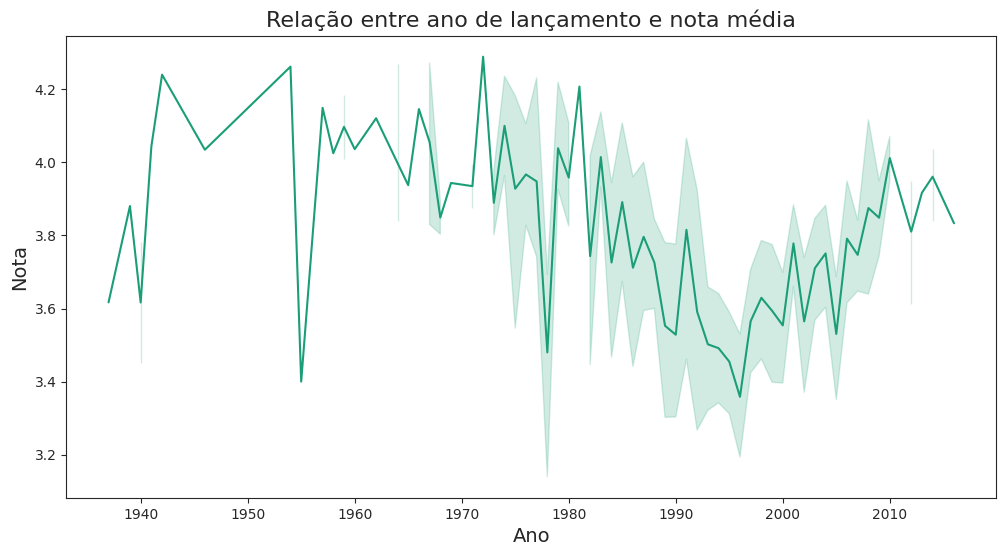

In [72]:
# solucao
lineplot_nota_ano = sns.lineplot(data = filmes,x = 'ano_de_lancamento',y = 'nota_media')
lineplot_nota_ano.figure.set_size_inches(12,6)
lineplot_nota_ano.set_xlabel('Ano', fontsize = 14)
lineplot_nota_ano.set_ylabel('Nota', fontsize = 14)
lineplot_nota_ano.set_title('Relação entre ano de lançamento e nota média',fontsize = 16)

## investigate the correlation between `ano_de_lancamento` and `nota_media`

- Calculate the correlation numerically.
- Correlation does not imply causation. What "issue" in data collection can generate this type of correlation?

In [73]:
# solução (código)
filmes[['ano_de_lancamento','nota_media']].corr()

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159146
nota_media,-0.159146,1.000000



### One potential issue in data collection that can generate a spurious correlation is confounding variables. If there are lurking variables that influence both the independent and dependent variables, it may create a misleading correlation, even though there is no direct cause-and-effect relationship. Proper experimental design, control, and consideration of potential confounding factors are essential to draw meaningful conclusions from correlational analyses.



## Analyze a pairplot

- Create a variable called infos based on the columns ano_de_lancamento (release year), nota_media (average rating), and total_de_votos (total votes) from the filmes dataset.
- Generate the pairplot using Seaborn.
- Include a linear regression for each small plot within it.

In [74]:
# solução
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]
infos.head()

,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,
1,1995.0,3.920930,215.0
2,1995.0,3.431818,110.0
3,1995.0,3.259615,52.0
6,1995.0,3.946078,102.0
7,1995.0,3.185185,54.0


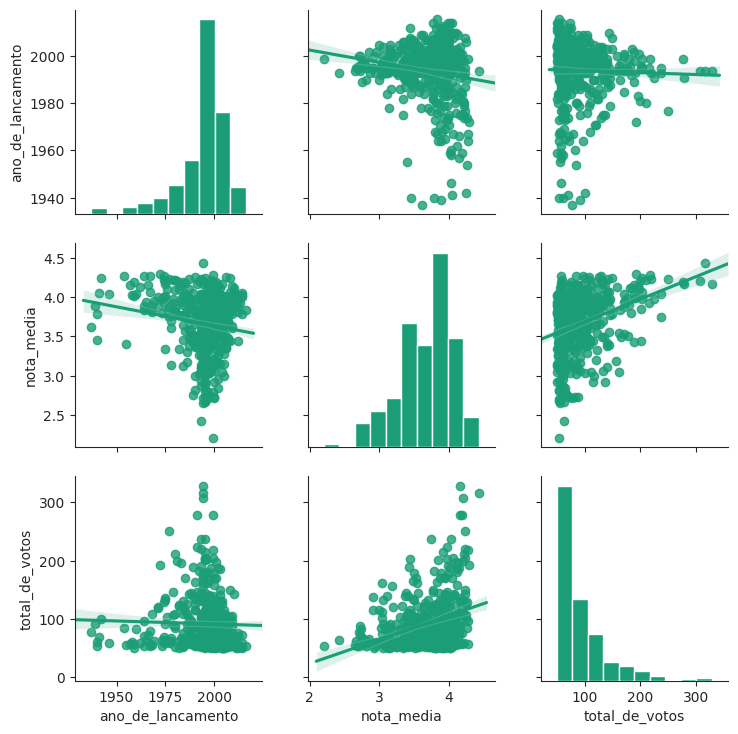

In [75]:
sns.pairplot(data = infos, kind = 'reg')

## Analyze a pairplot for the movies in the Animation category:

- Utilize the filmes dataframe.
- In a single pairplot, differentiate the Animation category movies from the others using distinct colors.
- Apply a palette such as husl.
- Use different markers for each of the two groups.
- Generate the pairplot using Seaborn and include a linear regression for each small plot within it.
- Use only three variables for both x and y: total_de_votos (total votes), ano_de_lancamento (release year), nota_media (average rating).

In [76]:
animation = filmes.query('Animation > 0')

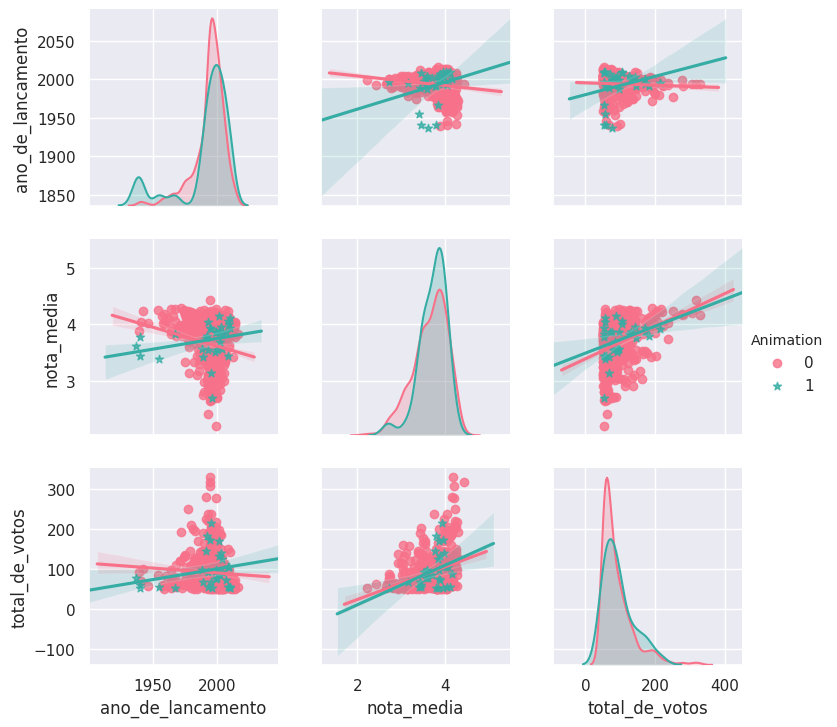

In [77]:
sns.set(color_codes=True,)
animation_pairplot = sns.pairplot(data = filmes, y_vars = ['ano_de_lancamento',
        'nota_media','total_de_votos'] , x_vars = ['ano_de_lancamento',
        'nota_media','total_de_votos'] ,hue = 'Animation', kind = 'reg',palette="husl",markers=['o','*'])

## Analyze the regression concerning the release year.

- How does the average_rating of older and more recent Animation movies seem to behave? (release year x average rating). Does this correlation appear to be low, but linear?
- And the release year x total_votes?
- What about the other categories? Compare this with the other movies.
- What hypotheses can you raise based on these results?

### Despite a low correlation, it is noticeable that the average rating of Animation films has increased over the years, showing a positive correlation.
### The total votes have also increased over the years, indicating a positive correlation.
### There is a positive correlation between total votes and average rating. Some correlations, such as average rating x release year and total votes x release year for other films, are inversely related compared to Animation films.
### There has been a substantial increase in both the number of votes and average ratings over time. This trend may be related to the stabilization of the average ratings as the sample size increases.



## Explore

- Share with us 2 additional visualizations that you find interesting.
Explain what you discovered.
- Use as many cells (text or code) as you deem necessary.

In [78]:
# solução

In [79]:
cinco_maiores_medias = filmes.sort_values(by = 'nota_media',ascending = False).head(5)

In [80]:
# verificando se há diferença significativa entre a maior nota média e as 4 demais notas.
cinco_maiores_medias = filmes.sort_values(by = 'nota_media',ascending = False).head(5)
cinco_maiores_medias

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,4.268041,97.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Visualize with histogram

In [81]:
sns.set_palette("Dark2")
sns.set_style('ticks')

Text(0.5, 1.0, 'Nota media por filmes (cinco maiores notas)')

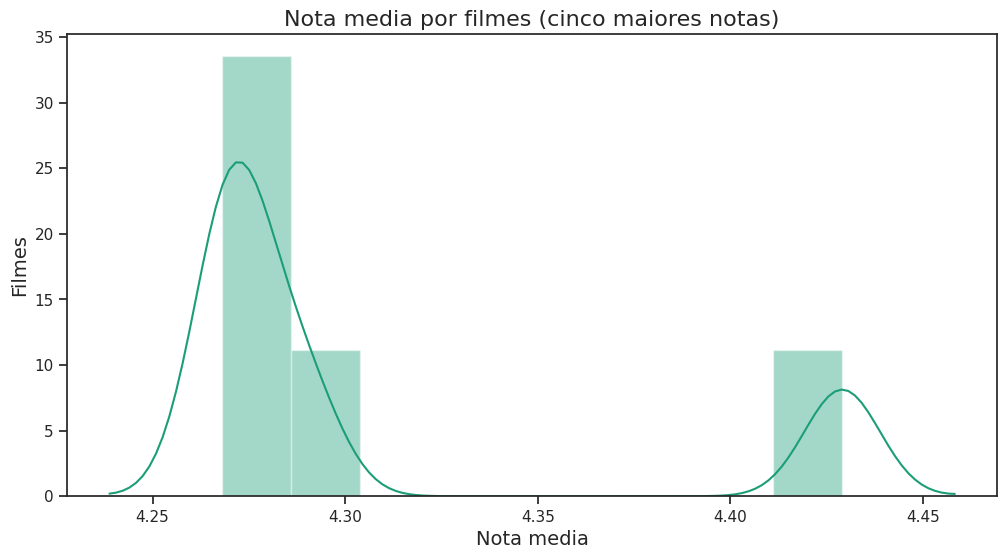

In [82]:
cinco_maiores_medias_hist = sns.distplot(cinco_maiores_medias['nota_media'])
cinco_maiores_medias_hist.figure.set_size_inches(12,6)
cinco_maiores_medias_hist.set_xlabel('Nota media', fontsize = 14)
cinco_maiores_medias_hist.set_ylabel('Filmes', fontsize = 14)
cinco_maiores_medias_hist.set_title('Nota media por filmes (cinco maiores notas)',fontsize = 16)

Apparently, there is a distinction between the movie with the highest average rating and the subsequent four films. I will apply a statistical test to confirm whether there is indeed a significant difference among them.

My hypothesis is that "The Shawshank Redemption" has a higher average rating than the following films, but those subsequent films do not exhibit a significant difference amongst themselves.

In [83]:
# Nota média do segundo ao quinto filmes com maiores notas
filmes_comparacao = filmes.query('filmeId in [858,2959,1276,750]')
filmes_comparacao.sort_values(by = 'nota_media', ascending = False)

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,4.268041,97.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Assigning values to the top 5 movies.

In [84]:
notas318 = notas.query('filmeId == 318')
notas318.nota.mean()

4.429022082018927

In [85]:
notas858 = notas.query('filmeId == 858')
notas858.nota.mean()

4.2890625

In [86]:
notas2959 = notas.query('filmeId == 2959')
notas2959.nota.mean()

4.272935779816514

In [87]:
notas1276 = notas.query('filmeId == 1276')
notas1276.nota.mean()

4.271929824561403

In [88]:
notas750 = notas.query('filmeId == 750')
notas750.nota.mean()

4.268041237113402

### The null hypothesis states that there is no difference between the averages of the two films, considering a p-value of 0.05.

In [89]:
# aplicando teste comparativo entre primeiro e segundo filmes com maior nota media
statstic, pvalue = ttest_ind(notas318.nota, notas858.nota)
print("O valor do tstatic é " + str(statstic))
print("O valor de p é " + str(pvalue))

O valor do tstatic é 1.9359504727033352
O valor de p é 0.053429292016727296


In [90]:
# conclusão da minha primeira hipótese
if pvalue > 0.05:
    print("Com 95% de confiança, não existe diferença entre a média dos filmes comparados")
else:
    print("Com 95% de confiança, existe diferença entre a média dos filmes comparados")

Com 95% de confiança, não existe diferença entre a média dos filmes comparados


In [91]:
# aplicando teste comparativo entre segundo e teceiro filmes com maior nota media
statstic, pvalue = ttest_ind(notas858.nota, notas2959.nota)
print("O valor do tstatic é " + str(statstic))
print("O valor de p é " + str(pvalue))

O valor do tstatic é 0.18479260890136148
O valor de p é 0.8534835248573589


In [92]:
if pvalue > 0.05:
    print("Com 95% de confiança, não existe diferença entre a média dos filmes comparados")
else:
    print("Com 95% de confiança, existe diferença entre a média dos filmes comparados")

Com 95% de confiança, não existe diferença entre a média dos filmes comparados


In [93]:
# aplicando teste comparativo entre terceiro e quarto filmes com maior nota media
statstic, pvalue = ttest_ind(notas2959.nota, notas1276.nota)
print("O valor do tstatic é " + str(statstic))
print("O valor de p é " + str(pvalue))

O valor do tstatic é 0.00826939729559238
O valor de p é 0.9934080903427058


In [94]:
if pvalue > 0.05:
    print("Com 95% de confiança, não existe diferença entre a média dos filmes comparados")
else:
    print("Com 95% de confiança, existe diferença entre a média dos filmes comparados")

Com 95% de confiança, não existe diferença entre a média dos filmes comparados


It is possible to observe that when comparing films with seemingly smaller differences in average values, the p-value tends to be closer to 100%.

We can assert that there is no statistically significant difference among the top 5 films with the highest average ratings.